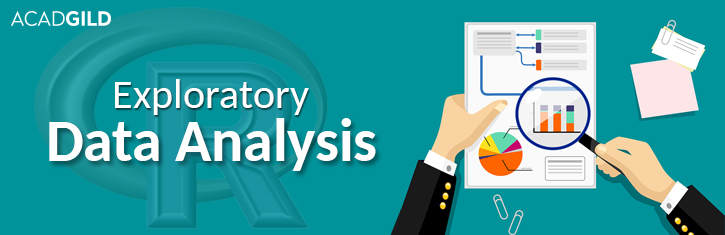

# <font color=blue>EDA - 'MARKETING CAMPAIGN OF BANKING PRODUCTS'</font>

<b>Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
 
#### ABOUT THE DATASET

The file Banking_Personal_Loan.csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

#### <b>THE GOAL IS..
- To sell more personal loans to Bank Customers
- To devise campaigns to better target marketing to increase the success ratio with minimal budget
- To identify the potential customers who have a higher probability of purchasing loans
- Increase the success ratio while at the same time reduce the cost of the campaign.

## Lets Get Started.....!!!

## <font color='blue'> 1.IMPORTING THE DATASET AND BASIC INFORMATION.</font>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling2.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [6]:
df.columns

Index([u'ID', u'Age', u'Experience', u'Income', u'ZIP Code', u'Family',
       u'CCAvg', u'Education', u'Mortgage', u'Personal Loan',
       u'Securities Account', u'CD Account', u'Online', u'CreditCard'],
      dtype='object')

### <b> Data Description:
    
- <b>ID</b>: Customer ID
- <b>Age</b>: Customer's age in completed years
- <b>Experience</b>: Years of professional experience
- <b>Income</b>: Annual income of the customer
- <b>Zip Code</b>:Home Address ZIP code.
- <b>Family</b>: Family size of the customer
- <b>CCAvg</b>: Avg.spending on credit cards per month 
- <b>Education</b>: Education Level 1: Undergrad ; 2: Graduate ; 3: Advanced/Professional
- <b>Mortgage</b>: Value of house mortgage if any. 
- <b>Personal Loan</b>: Did this customer accept the personal loan offered in the last campaign?
- <b>Securities Account</b>: Does the customer have a securities account with the bank?
- <b>CD Account</b>: Does the customer have a certificate of deposit (CD) account with the bank?
- <b>Online</b>: Does the customer use internet banking facilities?
- <b>CreditCard</b>: Does the customer use a credit card issued by UniversalBank?

<b> The shape indicates there are 5000 customers and 14 types of data collected from them.

In [7]:
df.shape

(5000, 14)

<b>Number of Null value:This indicates there are no null values.

In [8]:
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<b>Observation

- Column "Experience" has some negative value. Need to fix
- Binary variables "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data
- Ordinary Cat variables "Family" and "Education" are clean too

 ## <font color='blue'> 2.EXPLORATORY DATA ANALYSIS.</font>

#### 2.1.Unique values and samples

In [10]:
list = []
for col in df.columns:
    list.append([col,df[col].nunique() ,df[col].sample(10).drop_duplicates().values])

In [11]:
df_Unique=pd.DataFrame(data=list , columns=['Features','Unique','Uniquesample'])
df_Unique

,Features,Unique,Uniquesample
0,ID,5000,"[3832, 3134, 4633, 73, 2908, 4081, 291, 505, 3..."
1,Age,45,"[35, 33, 48, 39, 62, 44, 41]"
2,Experience,47,"[13, 14, 22, 9, 2, 25, 1, 33]"
3,Income,162,"[81, 43, 105, 38, 85, 98, 118, 53, 63, 179]"
4,ZIP Code,467,"[93727, 95616, 92109, 94143, 93711, 94550, 950..."
5,Family,4,"[1, 3, 4, 2]"
6,CCAvg,108,"[2.5, 1.4, 2.0, 5.9, 0.7, 0.0, 0.5, 0.9]"
7,Education,3,"[2, 1, 3]"
8,Mortgage,347,"[373, 230, 323, 0, 126, 327]"
9,Personal Loan,2,"[0, 1]"


#### 2.2.Number of customers with zero mortgage

In [12]:
#getting the output but other values as well
mortgage_counts = df['Mortgage'].value_counts().to_frame()
mortgage_counts.head(1)

,Mortgage
0,3462


#### 2.3.Number of customers with zero credit card spending per month

In [13]:
credit_counts = df['CreditCard'].value_counts().to_frame()
credit_counts.head()

,CreditCard
0,3530
1,1470


#### <b>2.4.Number of customers having CD Account(yes/no) with the bank

In [14]:
cd = df['CD Account'].value_counts().to_frame()
cd.head()

,CD Account
0,4698
1,302


#### <b>2.5.Number of customers having Securities Account(yes/no) with the bank

In [15]:
s = df['Securities Account'].value_counts().to_frame()
s.head()

,Securities Account
0,4478
1,522


#### <b>2.6.Number of customers using online banking facicility(yes/no).

In [16]:
o = df['Online'].value_counts().to_frame()
o.head()

,Online
1,2984
0,2016


### <b> 2.7.Univariate Analysis

<b> Verification of dataset of campaign
    
First graph is count of customers opted for loans(yes/no) and second graph is thier percent distribution(Out of 5000) .

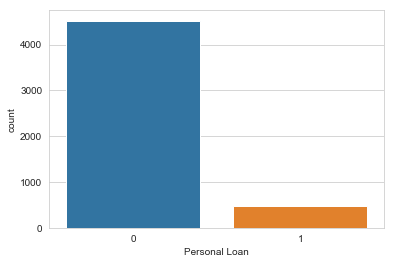

In [17]:
sns.countplot(x='Personal Loan',data=df)

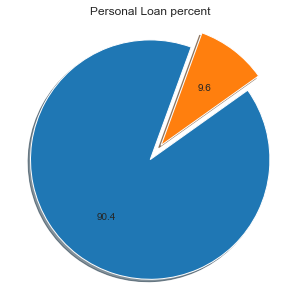

In [18]:
temp=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
temp.columns=['Labels','Personal Loan']
fig1, ax1=plt.subplots(figsize=(5,5))
explode=(0,0.15)
ax1.pie(temp['Personal Loan'],explode=explode,autopct='%1.1f',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan percent')
plt.show()

#### <b>Graph showing customer count (Out 0f 5000) in different categories.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C40C438>,
      dtype=object)

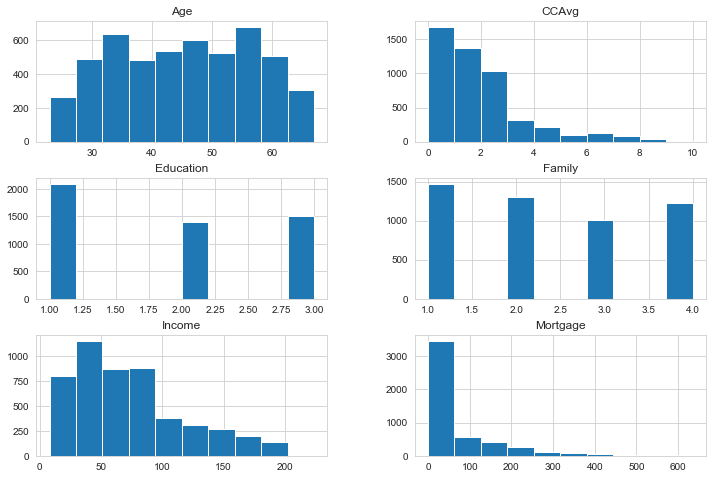

In [19]:
features = ['Income', 'CCAvg', 'Family','Mortgage','Education','Age']
df[features].hist(figsize=(12, 8))

#### <b>Conclusion:

- Most of the customers fall in the age range of 30 to 60 yrs.
- Many have experience in the range of 5 to 35 years.
- Most Customers have  income between 10K to 100K dollars.
- Many customers have Credit Card spending within 2000 dollars and maximum upto 8000 dollars.
- Most customers are undergraduate.Number of Graduates and professinals are fairly same.
- Customer families are fairly equally distributed.
- Customers have mortgage value within 100,000 dollars.

<b> Since the distribution is Low , We aim at doing Analysis and Build Accurate models to improve Personal Loan sales.

### <b>Exploring correlation between Personal Loan and other Factors.

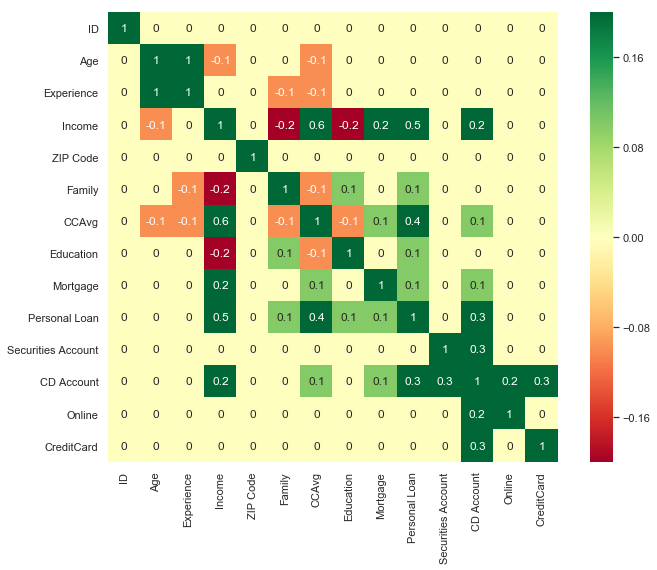

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr().round(1), square=True, cmap='RdYlGn', annot=True,vmax=0.2)

<b>Personal Loan</b> is the <b>Target</b>.

#### So across the diagonal elements will be same and thus highly related.So we look at Personal Loan.

<b>Conclusions:</b>
* <b>Mostly related</b> - Income, CCAvg, CD account
* <b>Moderately related</b> - Education, Family, Mortgage,Age
* <b>Least related</b> - ID, Expirence,ZIP Code,Securities Account,Online

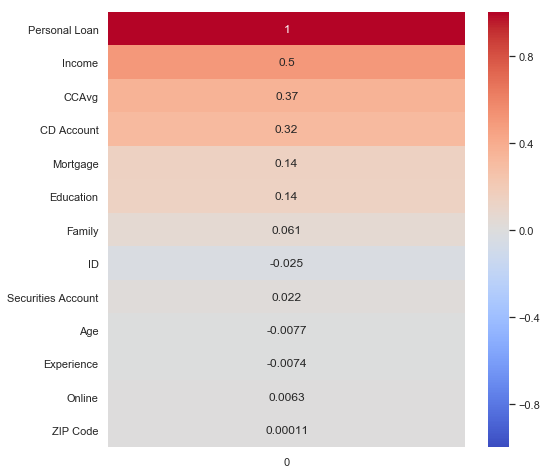

In [21]:
corr = df.corrwith(df['Personal Loan']).iloc[:-1].to_frame()
corr['abs'] = corr[0].abs()
sorted_corr = corr.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sorted_corr.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

#### <b>2.8.Bivariate Analysis:
 
### <b><font color='blue'>2.8.1Analysis of Personal Loan against highly correlated Numerical Factors and Conclusions.</font> 

<b>1.Income:
* People with higher income have higher probability of taking the loan (as thier repaying capaciy is good ) so they should be focussed than lower income group

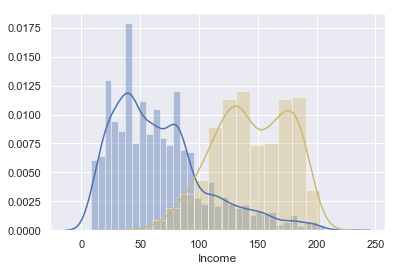

In [22]:
plt.figure(figsize=(6,4))
sns.distplot( df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['Income'], color = 'y')
plt.show()

<b>2.CCAvg:
* People with Credit Card spending between 0-6k dollar prefer taking loans.

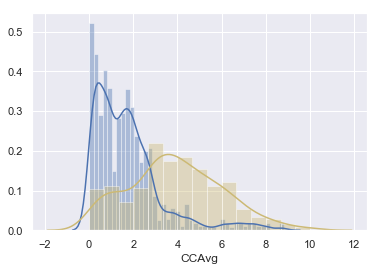

In [23]:
plt.figure(figsize=(6,4))
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color = 'y')

<b>3.Age:
* The customers aged between 30-50 are inclines towards loans as they aim at towards financial stability.While customers nearing thier retirement show less interest.

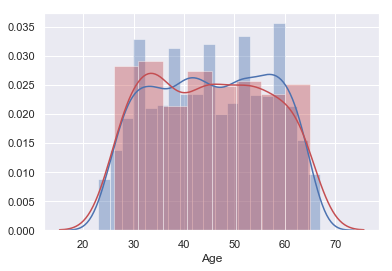

In [24]:
plt.figure(figsize=(6,4))
sns.distplot( df[df["Personal Loan"] == 0]['Age'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['Age'], color = 'r')

<b>4.Education:
* The Graduates and Advanced Professional tend to take loans. 

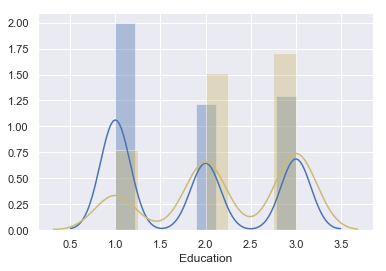

In [25]:
plt.figure(figsize=(6,4))
sns.distplot( df[df["Personal Loan"] == 0]['Education'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['Education'], color = 'y')

<b>5.Online: 

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


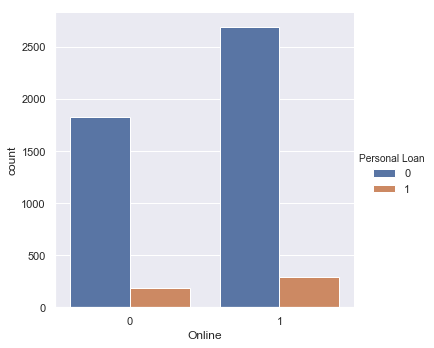

In [26]:
sns.factorplot('Online',data=df,hue='Personal Loan',kind='count')

In [27]:
on = df[df['Online'] == 1]['Personal Loan'].value_counts()

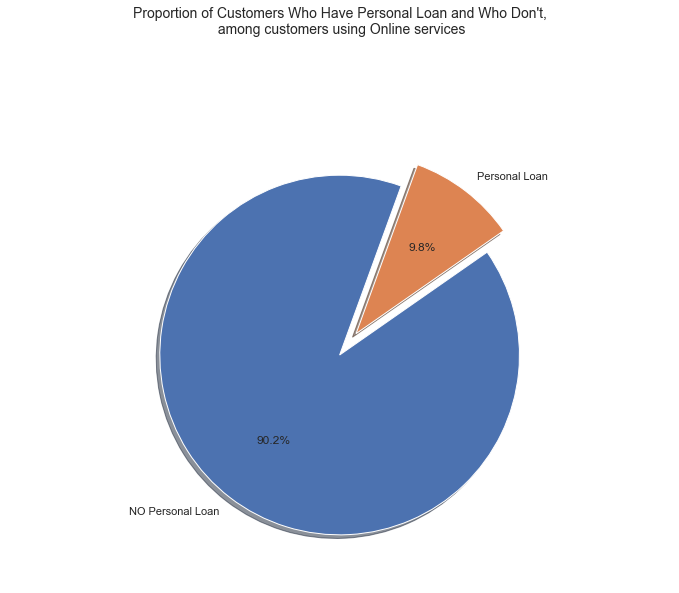

<Figure size 216x216 with 0 Axes>

In [36]:
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among customers using Online services', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(on, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0, 0.15), startangle = 70)
plt.figure(figsize=(3,3))
plt.show()


#### <b>6.CD Account:

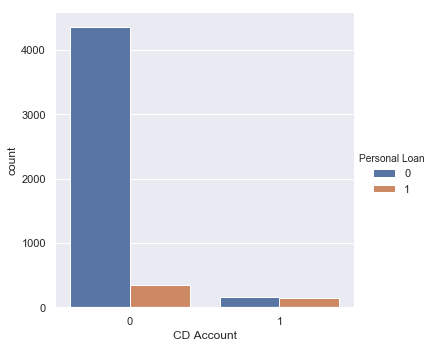

In [37]:
sns.factorplot('CD Account',data=df,hue='Personal Loan',kind='count')

In [38]:
cd = df[df['CD Account'] == 1]['Personal Loan'].value_counts()

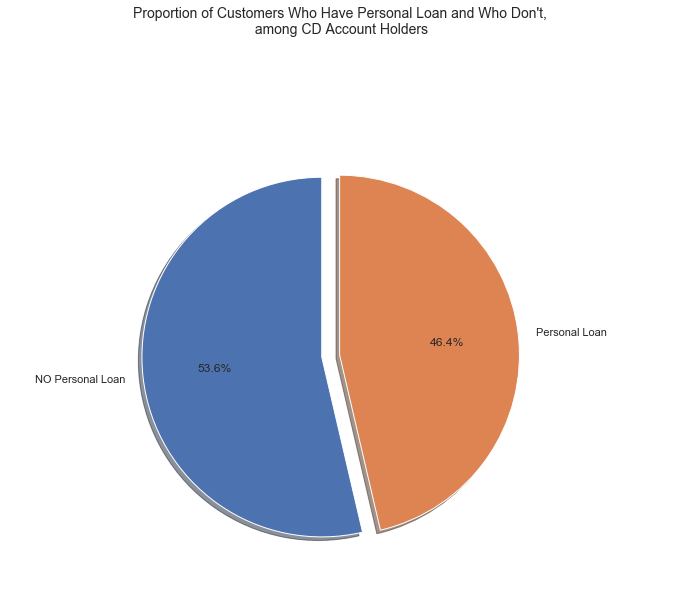

<Figure size 432x288 with 0 Axes>

In [40]:
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(cd, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), startangle = 90)
plt.figure(figsize=(6,4))
plt.show()


<b>- 46.4% of the customers with CD Account are likely to offer personal Loan offers.

### <font color='blue'>2.8.2.Analysis of Personal Loan with least correlated factors for thier Exclusion from Model</font>

<b>1.Family:
* These all cases have fairly equal probablitity of having loans.

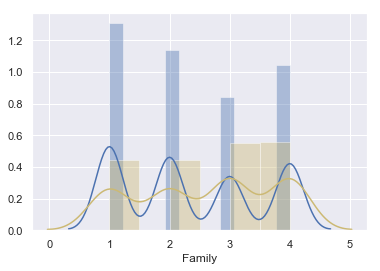

In [41]:
plt.figure(figsize=(6,4))
sns.distplot( df[df["Personal Loan"] == 0]['Family'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['Family'], color = 'y')

#### <b> 2.Age and Experience :
* Age and Experience have a very linear relationship.Since we found strong association between 'Age' and 'Experience' we decided to exclude 'Experience' from analysis steps to avoid multicollinearity.

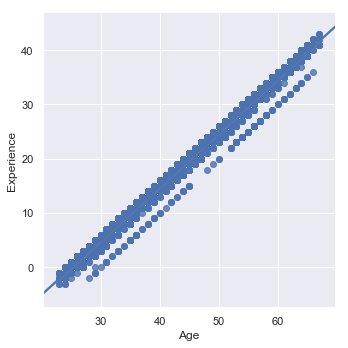

In [42]:
sns.lmplot('Age','Experience',data=df)

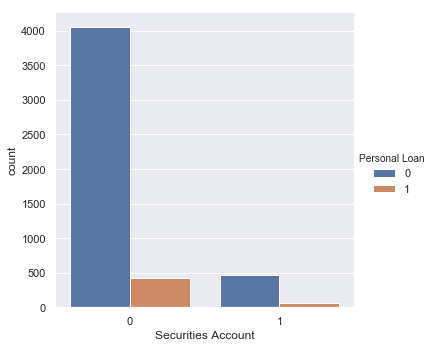

In [43]:
sns.factorplot('Securities Account',data=df,hue='Personal Loan',kind='count')

### <b>Conclusion:
 - We can <b>drop</b> the following parameters in new model.
    - ID are unique number values as recognition of customer and add no value to model.
    - Age and Experience are highly correlated and linear so we can drop Experience and consider only the age.
    - Customer taking loans and family, distribution are fairly same(No Conclusion) so we can skip Family Column in model.
    - Securities Account has no impact on loans.

### <b> This is the dataset after dropping columns wrt above conclusions. 

In [44]:
df_pr=df.drop(['Experience', 'Family', 'ID', 'Securities Account','ZIP Code'],  axis=1)
df_pr.head()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,CD Account,Online,CreditCard
0,25,49,1.6,1,0,0,0,0,0
1,45,34,1.5,1,0,0,0,0,0
2,39,11,1.0,1,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,1


 ## <font color='blue'> 3.PREPROCESSING THE NEW DATASET.</font>

#### 3.1.Income 
Distribution of Income feature is highly skewed. A closer look reveals that it has log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. In scikit-learn, PowerTransformer can be used with methods Box-Cox and Yeo-Johnson. This time we use Yeo-Johnson. The resulting distribution and its box plot is depicted below.

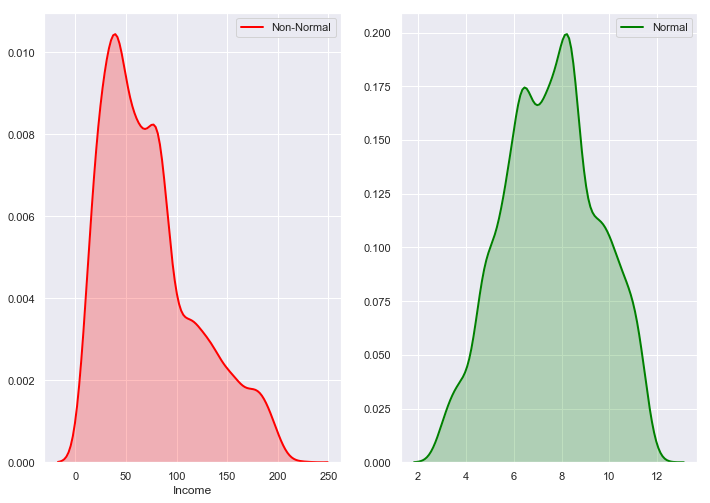

In [45]:
from sklearn.preprocessing import PowerTransformer

ptt = PowerTransformer(method='yeo-johnson',standardize=False)
ptt.fit(df_pr['Income'].values.reshape(-1,1))
tempp =ptt.transform(df_pr['Income'].values.reshape(-1,1))

fig, ax = plt.subplots(1, 2) 

sns.distplot(df['Income'] , hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="red",ax=ax[0]) 

sns.distplot(tempp, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green",ax=ax[1]) 

In [46]:
df_pr['Income']= pd.Series(tempp.flatten())

<Figure size 432x288 with 0 Axes>

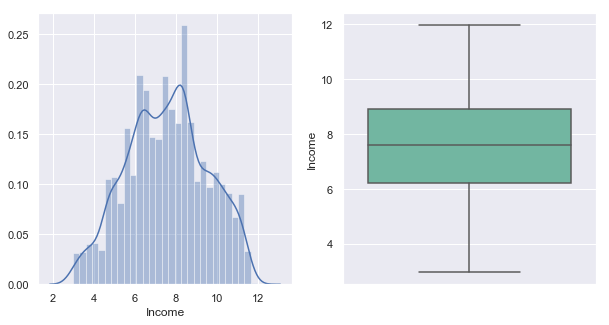

In [47]:
plt.figure(figsize=(6,4))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df_pr['Income'],ax=axes[0])
sns.boxplot(df_pr['Income'], orient="v", palette="Set2", ax=axes[1])

#### 3.2.Initially CCAvg was left skewed.Here we made it more centered and evenly spread.

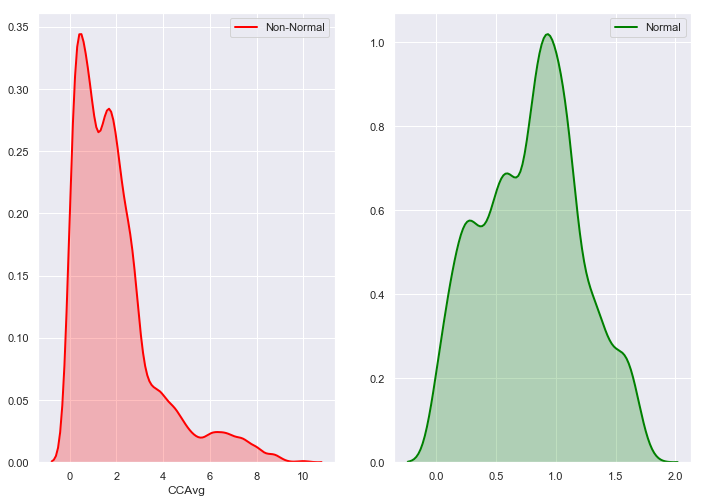

<Figure size 576x360 with 0 Axes>

In [48]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df_pr['CCAvg'].values.reshape(-1,1))
temp=pt.transform(df_pr['CCAvg'].values.reshape(-1,1))

fig, ax = plt.subplots(1, 2) 

sns.distplot(df['CCAvg'] , hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="red",ax=ax[0]) 

sns.distplot(temp, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green",ax=ax[1]) 
plt.figure(figsize=(8,5))
plt.show()

<Figure size 432x288 with 0 Axes>

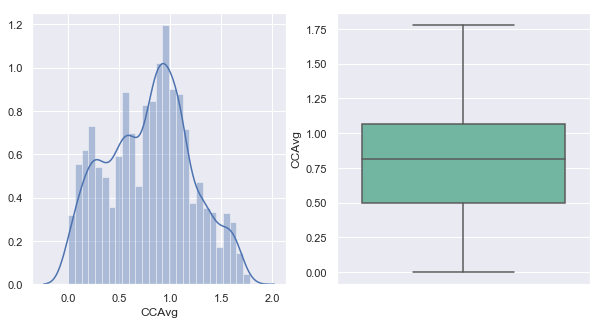

In [49]:
plt.figure(figsize=(6,4))
df_pr['CCAvg']= pd.Series(temp.flatten())

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df_pr['CCAvg'],ax=axes[0])
sns.boxplot(df_pr['CCAvg'], orient="v", palette="Set2", ax=axes[1])

#### <b>3.3.Mortgage Value Correction.

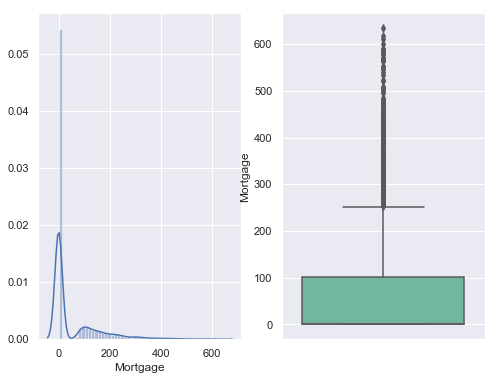

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))

sns.distplot(df["Mortgage"], ax=axes[0]);
sns.boxplot(df["Mortgage"], orient="v", palette="Set2", ax=axes[1])

#### <b> A lot of customers doesn't have mortgage and the right side of the distribution is almost flat. We can construct an ordinal categorical feature Mortgage_Int using Mortgage feature.

In [51]:
df_pr["Mortgage_Int"]=pd.cut(df_pr['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],
        include_lowest=True)
df_pr.drop('Mortgage',axis=1,inplace=True)

<b> Final Dataset for Modelling

In [52]:
df_pr.head()

,Age,Income,CCAvg,Education,Personal Loan,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,0.845160,1,0,0,0,0,0
1,45,5.876952,0.814478,1,0,0,0,0,0
2,39,3.504287,0.633777,1,0,0,0,0,0
3,35,8.983393,1.107427,2,0,0,0,0,0
4,35,6.597314,0.633777,2,0,0,0,1,0


 ## <font color='blue'> 4.MODELLING THE FINAL DATASET.</font>

### 4.1.Model Building using LOGISTIC REGRESSION.

In [53]:
data_X=df_pr.loc[:, df_pr.columns !='Personal Loan']
data_Y=df_pr[['Personal Loan']]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y, test_size=0.3, random_state=0, stratify=data_Y)

In [57]:
log = LogisticRegression()
log.fit(X_train,Y_train)

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(3500, 8)
(1500, 8)
(3500, 1)
(1500, 1)


In [59]:
pred_test = log.predict(X_test)
pred_train = log.predict(X_train)

In [60]:
acc_Xtest= accuracy_score(Y_test,pred_test)
acc_Xtrain= accuracy_score(Y_train,pred_train)
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))

Accuracy on the X_test is : 0.9507
Accuracy on the X_train is : 0.9477


In [61]:
cm = metrics.confusion_matrix(Y_test,pred_test)
print(cm)

[[1346   10]
 [  64   80]]


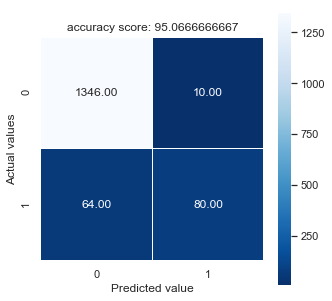

In [62]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);

In [63]:
print('Recall: ',recall_score(Y_test,pred_test))
print('Precision: ',precision_score(Y_test,pred_test))
print('F1 Score: ',f1_score(Y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(Y_test,pred_test))


('Recall: ', 0.5555555555555556)
('Precision: ', 0.8888888888888888)
('F1 Score: ', 0.6837606837606838)
('ROC_AUC Score: ', 0.7740904621435595)


In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.89      0.56      0.68       144

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.95      0.95      0.95      1500



### <b> 4.2.Model Building by SVM

In [66]:
from sklearn import svm

In [67]:
sv= svm.SVC(kernel='linear',C=1)
sv.fit(X_train,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
pred_test = sv.predict(X_test)
pred_train = sv.predict(X_train)

In [69]:
acc_Xtest= accuracy_score(Y_test,pred_test)
acc_Xtrain= accuracy_score(Y_train,pred_train)
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))

Accuracy on the X_test is : 0.9567
Accuracy on the X_train is : 0.9557


In [70]:
cm = metrics.confusion_matrix(Y_test,pred_test)
print(cm)

[[1343   13]
 [  52   92]]


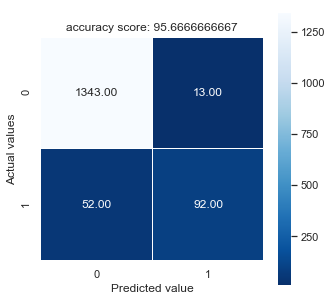

In [71]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);

In [72]:
print('Recall: ',recall_score(Y_test,pred_test))
print('Precision: ',precision_score(Y_test,pred_test))
print('F1 Score: ',f1_score(Y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(Y_test,pred_test))


('Recall: ', 0.6388888888888888)
('Precision: ', 0.8761904761904762)
('F1 Score: ', 0.7389558232931727)
('ROC_AUC Score: ', 0.8146509341199606)


In [73]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.88      0.64      0.74       144

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.92      0.81      0.86      1500
weighted avg       0.95      0.96      0.95      1500



### <b> 4.3.Model Building by DECISION TREE

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
pred_test = dtree.predict(X_test)
pred_train = dtree.predict(X_train)

In [77]:
acc_Xtest= accuracy_score(Y_test,pred_test)
acc_Xtrain= accuracy_score(Y_train,pred_train)
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))

Accuracy on the X_test is : 0.9687
Accuracy on the X_train is : 0.9723


In [78]:
cm = metrics.confusion_matrix(Y_test,pred_test)
print(cm)

[[1351    5]
 [  42  102]]


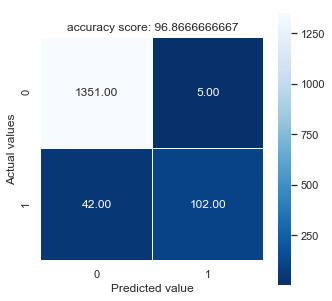

In [79]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);

In [80]:
print('Recall: ',recall_score(Y_test,pred_test))
print('Precision: ',precision_score(Y_test,pred_test))
print('F1 Score: ',f1_score(Y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(Y_test,pred_test))


('Recall: ', 0.7083333333333334)
('Precision: ', 0.9532710280373832)
('F1 Score: ', 0.8127490039840637)
('ROC_AUC Score: ', 0.8523230088495576)


In [81]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.95      0.71      0.81       144

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.96      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500



### <b> 4.4.Model building by RANDOM FOREST.

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
ranfor= RandomForestClassifier(max_depth=8,n_estimators=500)
ranfor.fit(X_train, Y_train)

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
pred_test = ranfor.predict(X_test)
pred_train = ranfor.predict(X_train)

In [133]:
acc_Xtest= accuracy_score(Y_test,pred_test)
acc_Xtrain= accuracy_score(Y_train,pred_train)
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))

Accuracy on the X_test is : 0.9740
Accuracy on the X_train is : 0.9846


In [134]:
cm = metrics.confusion_matrix(Y_test,pred_test)
print(cm)

[[1349    7]
 [  32  112]]


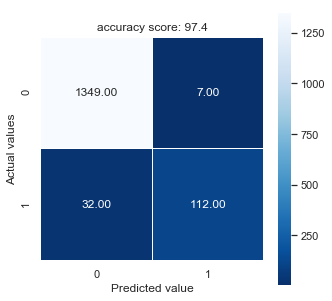

In [135]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);

In [136]:
print("Recall: " ,recall_score(Y_test,pred_test))
print('Precision: ',precision_score(Y_test,pred_test))
print('F1 Score: ',f1_score(Y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(Y_test,pred_test))


('Recall: ', 0.7777777777777778)
('Precision: ', 0.9411764705882353)
('F1 Score: ', 0.8517110266159694)
('ROC_AUC Score: ', 0.886307767944936)


In [137]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.94      0.78      0.85       144

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.96      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500



 ## <font color='blue'> 5.BUSINESS UNDERSTANDING OF THE MODEL.</font>

### <b> Comparison
We applied many model and came to conclusion that when using RANDOM FOREST gives more accurate results.It has precision of 94.11% , better than any other model. 

### <b>EDA observations and Recommendations</b>
<b>Observations</b>:

1.Customers with annual income 100K to 200K are much more likely to accept personal loan. Customers with annual income less than 75K are much less likely to accept personal loan.

2.Customers with a CD account are much more likely to accept personal loan.

3.Customers with monthly credit card spending more than 3K are more likely to accept personal loan.

4.Customers with graduate and advanced education are more likely to accept personal loan than undergrad.

5.Customers accepting personal loans have a evenly distributed age from 20s to 60s.

6.Customers using Online Banking services are likely to accept Personal Loans.

<b>Recommendation 1</b>: Focus on VIP customers with annual income 100K to 200K or with a CD account in the bank.

<b>Recommendation 2</b>: Focus on customers with monthly credit card spending more than 3K or with a family size of 3 and 4, or with graduate and advanced education.

<b>Recommendation 3</b>: Get more zip code geographical information and cluster them into several big groups that will help in analysis better.

<b>Recommendation 4</b>: We can get more people people using Online services to buy loans through advertisements as it would be easy and hazzle free. 